# SEIRD

In [1]:
import os
import datetime

import pandas as pd
import numpy as np
np.random.seed(42)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(context='paper', style='darkgrid', font_scale=1.2)

In [2]:
DATA_DIR = 'data'
FILE_NAME = 'initial_timeseries_SEIRD.csv' 
FILE_PATH = os.path.join(os.pardir, DATA_DIR, FILE_NAME)

df = pd.read_csv(FILE_PATH)
df

,testing_date,total_tests,confirmed_positives,confirmed_deceased,estimate_recovered
0,2020-02-25,32,1.0,0.0,0.0
1,2020-02-26,41,1.0,0.0,0.0
2,2020-02-27,28,2.0,0.0,0.0
3,2020-02-28,13,2.0,0.0,0.0
4,2020-02-29,10,0.0,0.0,0.0
...,...,...,...,...,...
93,2020-05-28,456,1.0,0.0,2051.0
94,2020-05-29,561,0.0,0.0,2059.0
95,2020-05-30,258,0.0,0.0,2063.0
96,2020-05-31,245,0.0,0.0,2072.0


In [3]:
cum_positives = np.cumsum(df.confirmed_positives.values)
cum_deceased = np.cumsum(df.confirmed_deceased.values)

In [4]:
# initial conditions
S0 = np.max(cum_positives)
E0 = 10
I0 = 1
R0 = 0
D0 = 0
ic = [S0, E0, I0, R0, D0]

In [5]:
# training data
I_train = cum_positives - df.estimate_recovered.values
R_train = df.estimate_recovered.values
D_train = cum_deceased

In [6]:
from coropy.compartmental_models import SEIRDModel

model = SEIRDModel(loss_fn='mae')
params, loss = model.fit(I_train, R_train, D_train, ic)

In [7]:
(S_sim, E_sim, I_sim, R_sim, D_sim) = model.simulate()

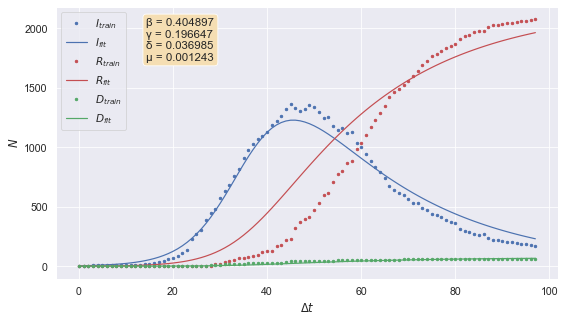

In [8]:
fig = plt.figure(figsize=(9, 5))
ax = fig.subplots(nrows=1, ncols=1)
ax.plot(I_train, '.', c='b', label='$I_{train}$')
ax.plot(I_sim, '-', c='b', label='$I_{fit}$')
ax.plot(R_train, '.', c='r', label='$R_{train}$')
ax.plot(R_sim, '-', c='r', label='$R_{fit}$')
ax.plot(D_train, '.', c='g', label='$D_{train}$')
ax.plot(D_sim, '-', c='g', label='$D_{fit}$')
ax.text(0.18, 0.96,
        f'β = {params[0]:.6f}\nγ = {params[1]:.6f}\nδ = {params[2]:.6f}\nμ = {params[3]:.6f}', 
        transform=ax.transAxes,
        verticalalignment='top', 
        bbox=dict(boxstyle='round', facecolor='wheat', alpha=1))
ax.set_xlabel('$\Delta t$')
ax.set_ylabel('$N$')
ax.legend()
plt.show();

In [9]:
# beta = 0.403471 <= average number of contacts per person per time 
# gamma = 0.195135 <= infectious rate = 1/(infectious time period)
# R0 = beta / gamma <= basic reproduction number
R0 = params[0] / params[1]
R0

2.059000629947315